## Practica#7: Data Clustering

El algoritmo k-means es una técnica de agrupamiento no supervisado que divide los datos en k grupos (clusters), donde los elementos dentro de cada grupo son más similares entre sí que con los de otros grupos

In [1]:
#importando librerias
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r'C:\Users\Acer\Desktop\trabajos facu\7mo semestre\AYDR_Tareas_MineriaDeDatos\csv\steam_limpio.csv'
, encoding='latin-1')      #recordar poner la direccion del csv steam_limpio csv

In [3]:
# Seleccionar variables relevantes para el clustering
variables_independientes = ['price', 'average_playtime', 'negative_ratings']

# Limpiar datos (eliminar valores nulos)
df = df.dropna(subset=variables_independientes)

# Dividir datos en características (X)
X = df[variables_independientes]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar el algoritmo k-means
k = 10  # Numero de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Etiquetas de los clusters
df['Cluster'] = kmeans.labels_

# Centroides de los clusters
centroids = kmeans.cluster_centers_

# ---------------------------------
# Resultados
# ---------------------------------
print("=== Centroides de los Clusters ===")
print(centroids)

=== Centroides de los Clusters ===
[[-3.54912407e-01 -5.23567190e-02 -3.02691554e-02]
 [ 9.41843430e-01  1.23514727e+01  1.03733502e+02]
 [ 2.30368707e+00  1.17461572e-01  1.00358497e-01]
 [ 9.02477235e-01  3.10891944e+01  1.64236085e-02]
 [ 1.89731062e+00  4.48947247e+00  1.76351114e+01]
 [-7.71855925e-01  1.04255466e+02 -4.41151341e-02]
 [ 5.05339633e+00  4.52091618e-01  4.45850417e-01]
 [ 2.48910935e+01 -8.19948486e-02 -4.83393100e-02]
 [ 7.61263588e-01 -4.29313607e-03 -1.63190035e-03]
 [ 2.35845485e-01  6.96520831e+00  7.29123852e-01]]



Número de puntos en cada cluster:
Cluster
0    20907
8     4815
2     1057
6      203
9       59
4       11
7       10
3       10
1        2
5        1
Name: count, dtype: int64


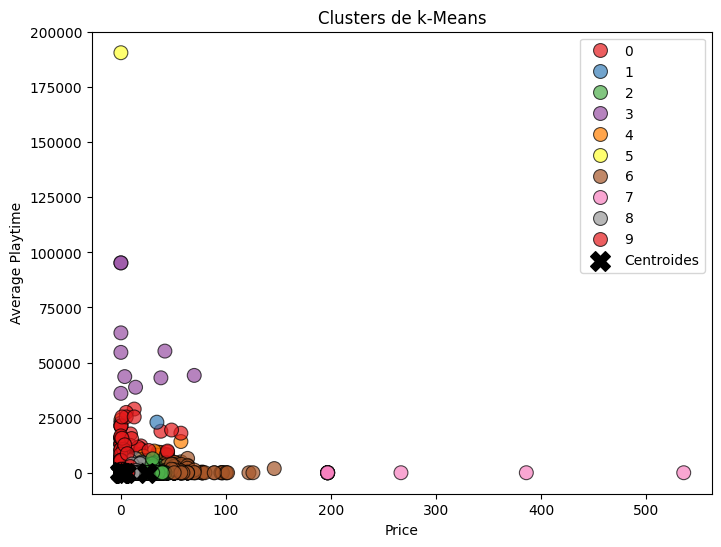

In [4]:
# Contar el número de puntos en cada cluster
print("\nNúmero de puntos en cada cluster:")
print(df['Cluster'].value_counts())

# Visualización de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['price'], y=df['average_playtime'], hue=df['Cluster'], palette='Set1', s=100, alpha=0.7, edgecolor='black')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroides')
plt.title("Clusters de k-Means")
plt.xlabel("Price")
plt.ylabel("Average Playtime")
plt.legend()
plt.show()